# SIR Modelling

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
df_analyse=pd.read_csv('COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,US,Germany
865,2022-06-05,43181335,84762022,26496611
866,2022-06-06,43185049,84882287,26498361
867,2022-06-07,43190282,85003945,26583016
868,2022-06-08,43197522,85214036,26660652
869,2022-06-09,43205106,85329656,26738530


In [3]:
df_analyse.India[35]

3

In [4]:
N0=1000000 #max susceptible population 
beta=0.8  # recovery coefficient
gamma=0.1  # Transmission coefficient
# beta/gamma is known as reproduction rate, it is chosen as 4 meaning 1 person can infect 4 people
# condition I0+S0+R0=N0
I0=df_analyse.India[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        dS+dI+dR=0
        S+I+R= N (constant p0opulation size)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

**Simulative approach to calculate SIR curves**

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [7]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999994.600007,5.099993,NaN,0.300000
1,999990.520035,8.669966,NaN,0.809999
2,999983.584128,14.738876,NaN,1.676996
3,999971.793221,25.055896,NaN,3.150883
4,999951.74907,42.594457,NaN,5.656473
5,999917.675148,72.408933,NaN,9.915919
6,999859.752771,123.090417,NaN,17.156812
7,999761.294247,209.239899,NaN,29.465854
8,999593.942286,355.667871,NaN,50.389844
9,999309.523527,604.519843,NaN,85.956631


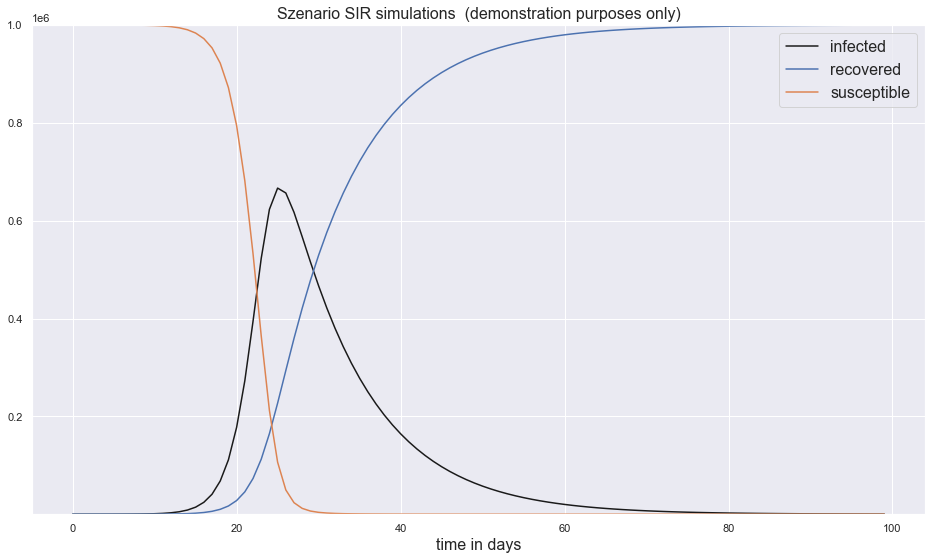

In [8]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR Modelling parameter fitting**

In [9]:
ydata = np.array(df_analyse.India[35:])
t=np.arange(len(ydata))

In [10]:
# re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.8

In [11]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [12]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # only dI is expected

In [13]:
# curve for diff. equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 3.00000000e+00,  4.04957048e+00,  5.46633682e+00,  7.37876085e+00,
        9.96024362e+00,  1.34448448e+01,  1.81484976e+01,  2.44976426e+01,
        3.30678681e+01,  4.46360530e+01,  6.02507210e+01,  8.13269517e+01,
        1.09774394e+02,  1.48169875e+02,  1.99990061e+02,  2.69924877e+02,
        3.64299456e+02,  4.91641619e+02,  6.63444139e+02,  8.95186820e+02,
        1.20770372e+03,  1.62900613e+03,  2.19670252e+03,  2.96119126e+03,
        3.98983761e+03,  5.37237374e+03,  7.22776349e+03,  9.71271778e+03,
        1.30318748e+04,  1.74492745e+04,  2.33000146e+04,  3.09996813e+04,
        4.10471168e+04,  5.40132778e+04,  7.05058311e+04,  9.10972501e+04,
        1.16206694e+05,  1.45937396e+05,  1.79894841e+05,  2.17042582e+05,
        2.55674455e+05,  2.93567396e+05,  3.28314029e+05,  3.57744704e+05,
        3.80294683e+05,  3.95197149e+05,  4.02468976e+05,  4.02741876e+05,
        3.97029126e+05,  3.86505277e+05,  3.72340480e+05,  3.55598141e+05,
        3.37185710e+05,  

The curves needs to be fitted. Beta and gamma are the free paramaters.

In [14]:
# To get the fitted curve
fitted=fit_odeint(t, *popt)

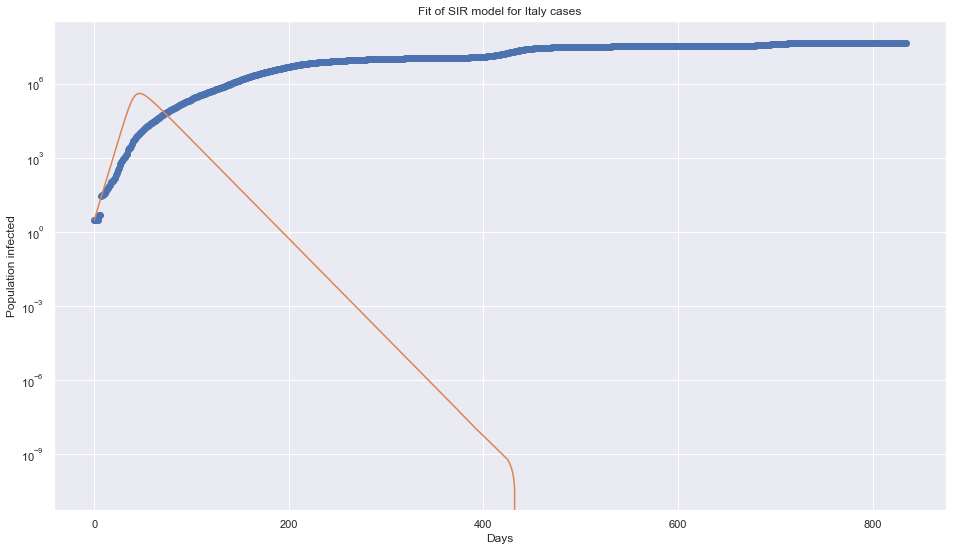

Optimal parameters: beta = 0.4  and gamma =  0.1
Basic Reproduction Number R0  4.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Italy cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki")

**Dynamic beta in SIR (Infection Rate)**

In [16]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [17]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [18]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

In [19]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999995.800004,3.899996,NaN,0.300000
1,999994.240012,5.069989,NaN,0.690000
2,999992.212028,6.590974,NaN,1.196999
3,999989.575659,8.568245,NaN,1.856096
4,999986.148396,11.138683,NaN,2.712920
5,999981.692985,14.480226,NaN,3.826789
6,999975.901,18.824188,NaN,5.274811
7,999968.371506,24.471263,NaN,7.157230
8,999958.583311,31.812333,NaN,9.604357
9,999945.858905,41.355505,NaN,12.785590


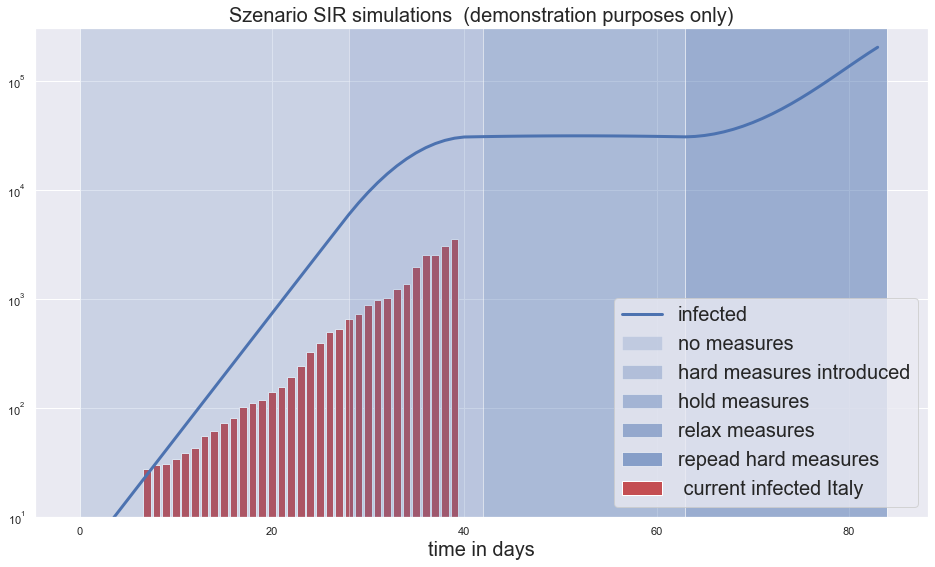

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Italy',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=20)
ax1.set_xlabel('time in days',size=20)
ax1.legend(loc='best',
           prop={'size': 20});

In [21]:
t_phases

array([28, 42, 63, 84], dtype=int32)

# SIR fit curve - Dynamic Dashboard

* Dynamic dashoard for fit curve
* SIR curve of various countries


In [22]:
df_analyse=pd.read_csv(r"COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,US,Germany
865,2022-06-05,43181335,84762022,26496611
866,2022-06-06,43185049,84882287,26498361
867,2022-06-07,43190282,85003945,26583016
868,2022-06-08,43197522,85214036,26660652
869,2022-06-09,43205106,85329656,26738530


In [23]:
# Extracting data of desired countries
df_an = df_analyse[['date','India','US','Germany']]
df_an

,date,India,US,Germany
0,2020-01-22,0,1,0
1,2020-01-23,0,1,0
2,2020-01-24,0,2,0
3,2020-01-25,0,2,0
4,2020-01-26,0,5,0
...,...,...,...,...
865,2022-06-05,43181335,84762022,26496611
866,2022-06-06,43185049,84882287,26498361
867,2022-06-07,43190282,85003945,26583016
868,2022-06-08,43197522,85214036,26660652


In [24]:
df_an = df_an.iloc[35:,]
df_an

,date,India,US,Germany
35,2020-02-26,3,16,21
36,2020-02-27,3,17,26
37,2020-02-28,3,17,53
38,2020-02-29,3,25,66
39,2020-03-01,3,32,117
...,...,...,...,...
865,2022-06-05,43181335,84762022,26496611
866,2022-06-06,43185049,84882287,26498361
867,2022-06-07,43190282,85003945,26583016
868,2022-06-08,43197522,85214036,26660652


In [25]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient

# Generating a dataframe of infected, recovered and susceptible population of the selected countries
df = pd.DataFrame()
country_list = ['India','US','Germany']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    dict1 = {'country': country, 'susceptible':S0, 'infected':I0,'recoverd':R0}
                                           
    
    
    df = df.append(dict1, ignore_index=True)
print(df)

   country  susceptible  infected  recoverd
0    India       999997         3         0
1       US       999984        16         0
2  Germany       999979        21         0


C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2470480901.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2470480901.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2470480901.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)


**Simulative approach to calculate SIR curve**

In [26]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient
propagation_rates=pd.DataFrame(index = [country],columns={'susceptible':S0,
                                           'infected':I0,
                                           'recoverd':R0})

def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

country_list = ['India','US','Germany']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    
    for each_t in np.arange(100):
        new_delta_vec=SIR_model(SIR,beta,gamma)
   
        SIR=SIR+new_delta_vec
    
        propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


        
print(propagation_rates.head())

C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\41598867.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\41598867.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\41598867.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\41598867.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pa

     susceptible  infected recoverd country  recovered
0            NaN       NaN      NaN     NaN        NaN
1  999995.800004  3.899996      NaN   India   0.300000
2  999994.240012  5.069989      NaN   India   0.690000
3  999992.212028  6.590974      NaN   India   1.196999
4  999989.575659  8.568245      NaN   India   1.856096


C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\41598867.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],


SIR_Curve-INDIA

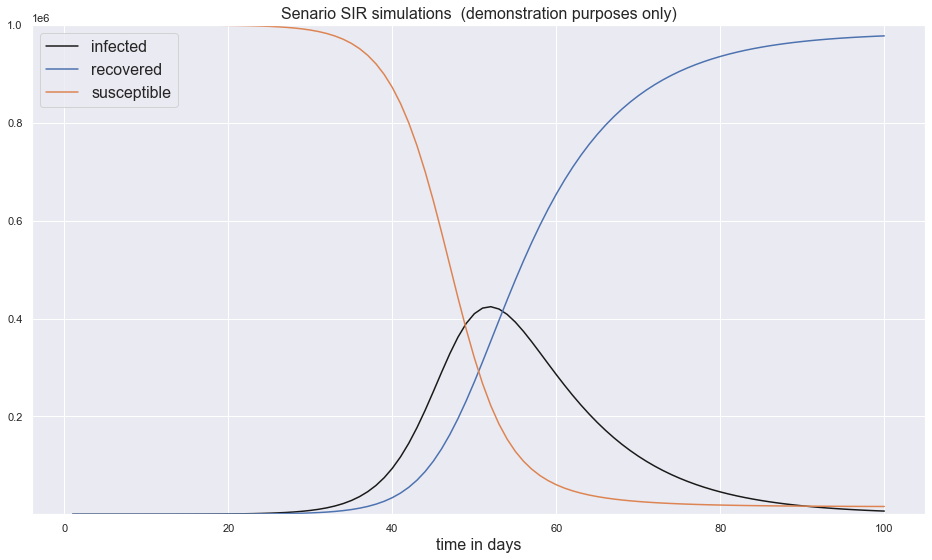

In [27]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[0:101],propagation_rates.infected[0:101],label='infected',color='k')
ax1.plot(propagation_rates.index[0:101],propagation_rates.recovered[0:101],label='recovered')
ax1.plot(propagation_rates.index[0:101],propagation_rates.susceptible[0:101],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-US**

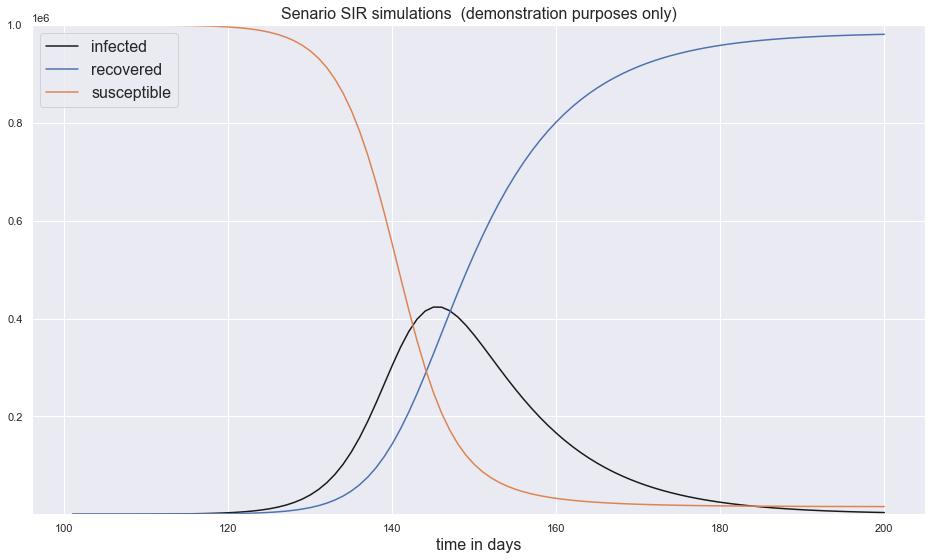

In [28]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[101:201],propagation_rates.infected[101:201],label='infected',color='k')
ax1.plot(propagation_rates.index[101:201],propagation_rates.recovered[101:201],label='recovered')
ax1.plot(propagation_rates.index[101:201],propagation_rates.susceptible[101:201],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

SIR_curve- Germany

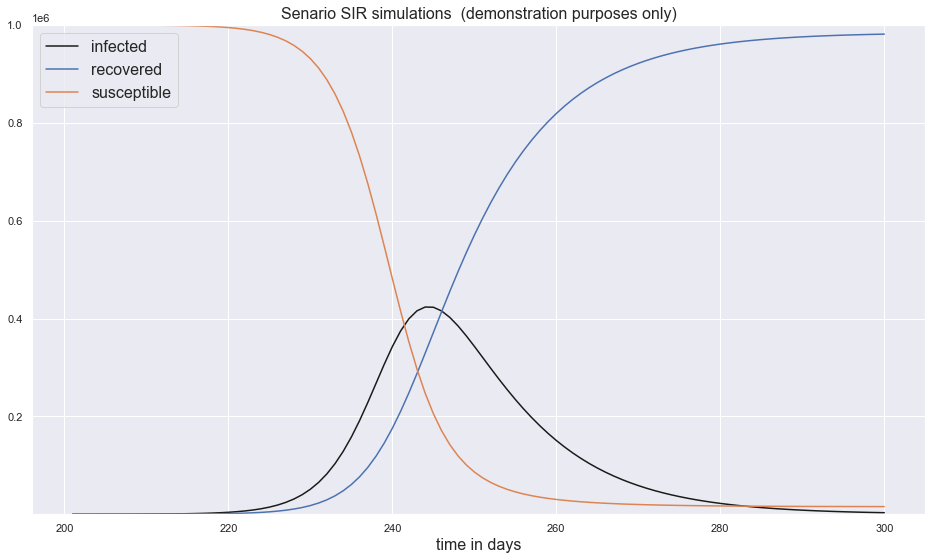

In [29]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[201:301],propagation_rates.infected[201:301],label='infected',color='k')
ax1.plot(propagation_rates.index[201:301],propagation_rates.recovered[201:301],label='recovered')
ax1.plot(propagation_rates.index[201:301],propagation_rates.susceptible[201:301],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Fitting parameters for SIR Model**

In [30]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [31]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 

In [32]:
country_list = ['India','US','Germany']
df1 = pd.DataFrame()
for country in country_list:
    ydata = np.array(df_analyse[country][35:])
    t = np.arange(len(ydata))
    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta
    
    # example curve of our differential equationa
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
    
    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
print(df1.T)

C:\Users\lokes\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\1295010750.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\1295010750.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\lokes\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2005337757.py:26: FutureWarning: The f

standard deviation errors :  [492.76110186 491.50598953]  start infect: 3
Optimal parameters: beta = 1.0493260778379219  and gamma =  0.950653068321959
standard deviation errors :  [299.3254108  296.83124632]  start infect: 16
Optimal parameters: beta = 1.0994791400875392  and gamma =  0.8997794884275716


C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2005337757.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
C:\Users\lokes\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\1295010750.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\lokes\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to ge

standard deviation errors :  [62.01635122 61.37204944]  start infect: 21
Optimal parameters: beta = 1.099130492872016  and gamma =  0.8991429437917414
                                                         0  \
country                                              India   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, ...   
fitted   [3.0, 3.311099943582056, 3.6544476126673477, 4...   

                                                         1  \
country                                                 US   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [16, 17, 17, 25, 32, 55, 74, 107, 184, 237, 40...   
fitted   [16.0, 19.536029658987054, 23.852963225896083,...   

                                                         2  
country                                            Germany  
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
ydata    [21, 26, 53, 66, 117, 150, 188, 240

C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\2005337757.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)


In [33]:
df1 

,country,t,ydata,fitted
0,India,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, ...","[3.0, 3.311099943582056, 3.6544476126673477, 4..."
1,US,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 17, 17, 25, 32, 55, 74, 107, 184, 237, 40...","[16.0, 19.536029658987054, 23.852963225896083,..."
2,Germany,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 26, 53, 66, 117, 150, 188, 240, 349, 534,...","[21.0, 25.648198416770068, 31.32426817799815, ..."


In [34]:
# Final dataframe
d_fin = pd.DataFrame({'timeline' : df1.t[0],'India_fitted': df1.fitted[0],  'India' : df1.ydata[0],
                  'US_fitted': df1.fitted[1],  'US' : df1.ydata[1],
                  'Germany_fitted': df1.fitted[2], 'Germany' : df1.ydata[2]})

d_fin

,timeline,India_fitted,India,US_fitted,US,Germany_fitted,Germany
0,0,3.000000e+00,3,1.600000e+01,16,2.100000e+01,21
1,1,3.311100e+00,3,1.953603e+01,17,2.564820e+01,26
2,2,3.654448e+00,3,2.385296e+01,17,3.132427e+01,53
3,3,4.033383e+00,3,2.912298e+01,25,3.825503e+01,66
4,4,4.451591e+00,3,3.555609e+01,32,4.671711e+01,117
...,...,...,...,...,...,...,...
830,830,-7.654609e-12,43181335,-2.760420e-14,84762022,-4.263160e-14,26496611
831,831,-7.534015e-12,43185049,-2.758887e-14,84882287,-4.260507e-14,26498361
832,832,-7.413420e-12,43190282,-2.757354e-14,85003945,-4.257854e-14,26583016
833,833,-7.292826e-12,43197522,-2.755820e-14,85214036,-4.255200e-14,26660652


**Curve for Italy**

* Original and fitted population

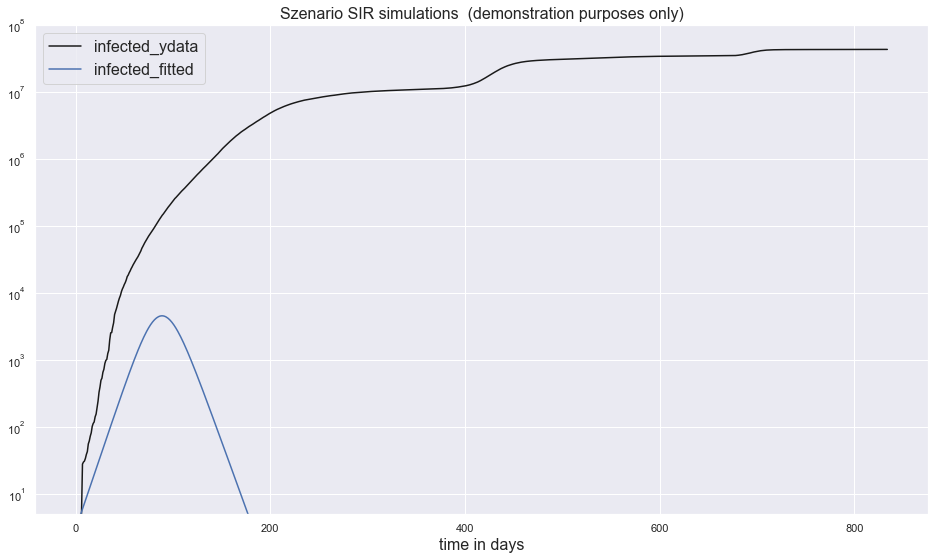

In [35]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[0],df1.ydata[0],label='infected_ydata',color='k')
ax1.plot(df1.t[0],df1.fitted[0],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for Germany**

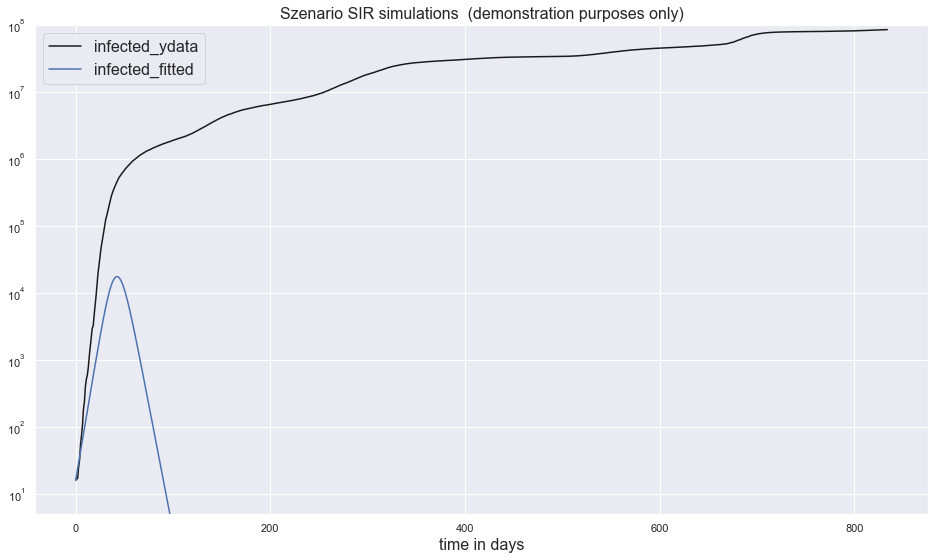

In [36]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[1],df1.ydata[1],label='infected_ydata',color='k')
ax1.plot(df1.t[1],df1.fitted[1],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for India**

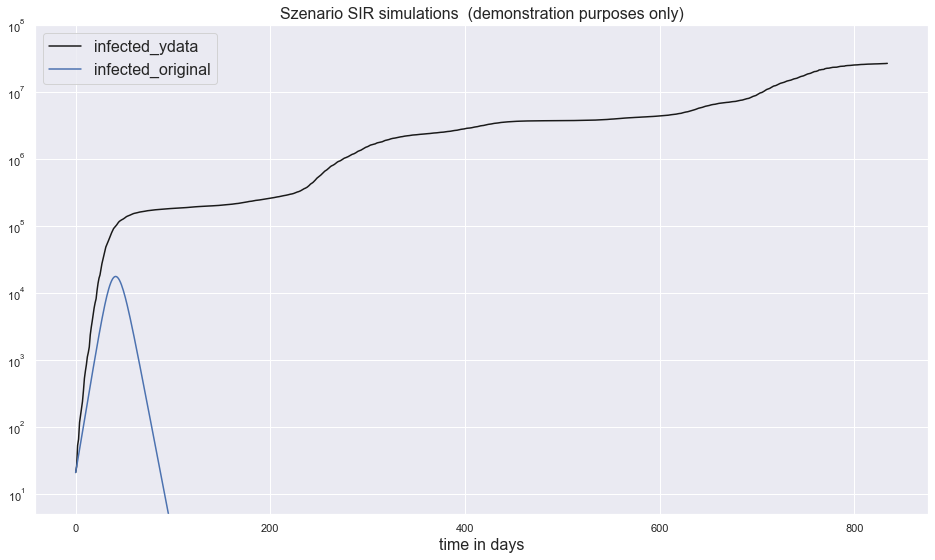

In [37]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[2],df1.ydata[2],label='infected_ydata',color='k')
ax1.plot(df1.t[2],df1.fitted[2],label='infected_original')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});


# Dynamic Dashboard

* Use of Dash Plotly

In [38]:
country_list = ['India','US','Germany']
country_list

['India', 'US', 'Germany']

In [39]:

import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os



fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([
    dcc.Markdown('''
    #  Dynamic Dashboard
    (Using Dash Plotly)

    Goal of the exercise is to select and visualize the fit of different countries.

    '''),
    
   
    html.Br(),
    html.Br(),

    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': 'India','value':'India'},
                  {'label': 'US','value':'US'},
                  {'label': 'Germany','value':'Germany'}],
        value=['Italy'],# which are pre-selected
        placeholder = 'Multi-Select Country for Visualization',
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])

C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3325240764.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\lokes\AppData\Local\Temp\ipykernel_2748\3325240764.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [40]:
@app.callback(Output('main_window_slope', 'figure'),[Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=d_fin.timeline,y=d_fin[str(each + '_fitted')],mode='markers+lines',opacity=0.9,name=str(each+"_fitted")))
            
        traces.append(dict(x=d_fin.timeline,y=d_fin[each],mode='markers+lines',opacity=0.9,name= str(each+"_ydata")))

    return {
            'data': traces,
            'layout': dict(width=1280,height=720, title = 'Infected along with fit curve',
                            xaxis={'title':'Timeline','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#7f7f7f")},
                            yaxis= {'type':"log",'range':'[1.1,5.5]'})}

In [ ]:
if __name__ == '__main__':

    app.run_server(port = 4086,debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:4086/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
